In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")

# Create images folder if it doesn't exist
os.makedirs("../../images", exist_ok=True)

# Function to save plots
def save_plot(filename):
    plt.savefig(f"../../images/{filename}", dpi=300, bbox_inches='tight')
    plt.show()

In [2]:
df = pd.read_csv("../data/Online Retail Data Set.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe(
)

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Data Cleaning
Missing values and duplicates were removed to ensure accurate analysis.


In [6]:
df.isnull().sum()
df = df.drop_duplicates()
df = df.dropna()



In [7]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


Exploratory Data Analysis (EDA)



Revenue Distribution

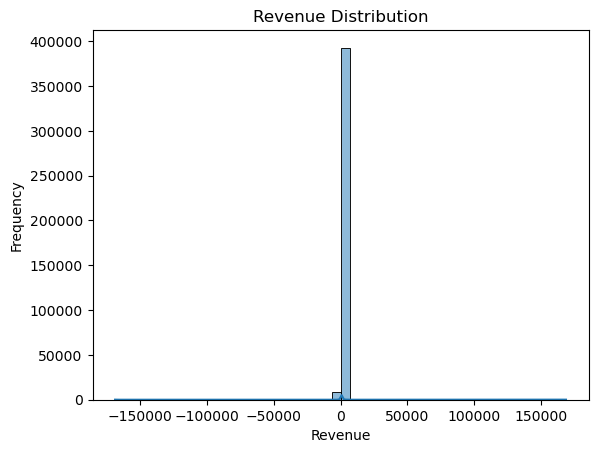

In [8]:
plt.figure()
sns.histplot(df['Revenue'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
save_plot("01_revenue_distribution.png")


Revenue by Product Category

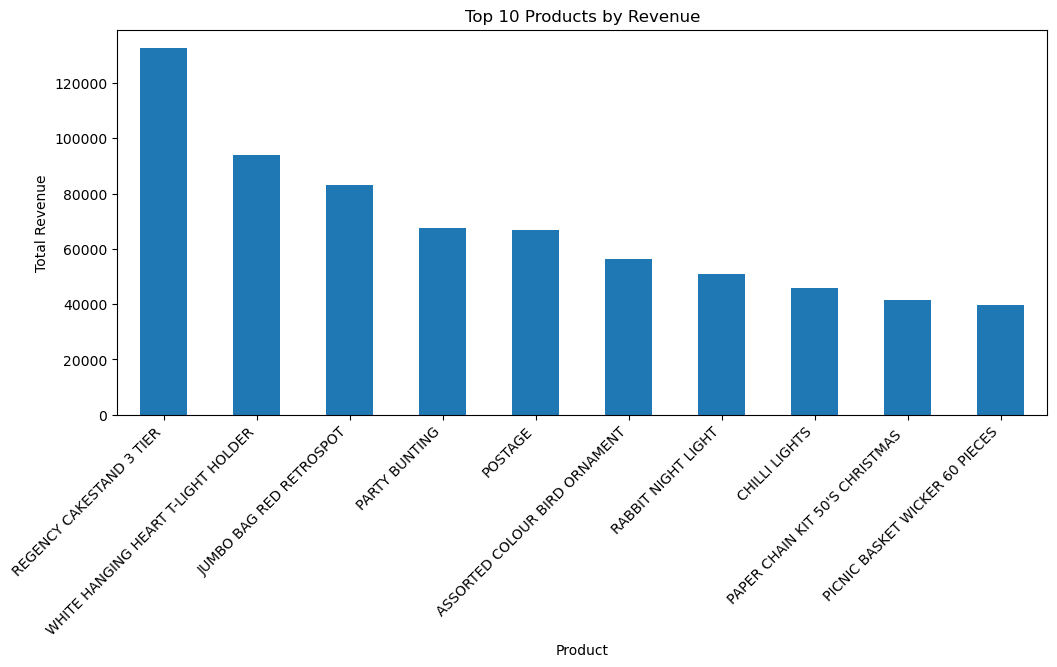

In [9]:
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
product_revenue.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
save_plot("02_top_products_revenue.png")


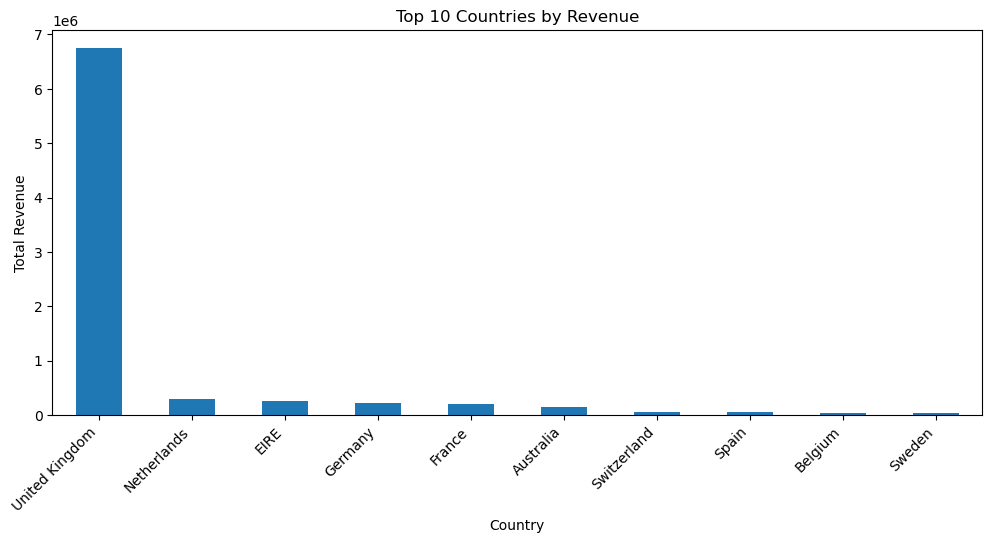

In [10]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
country_revenue.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
save_plot("03_top_countries_revenue.png")


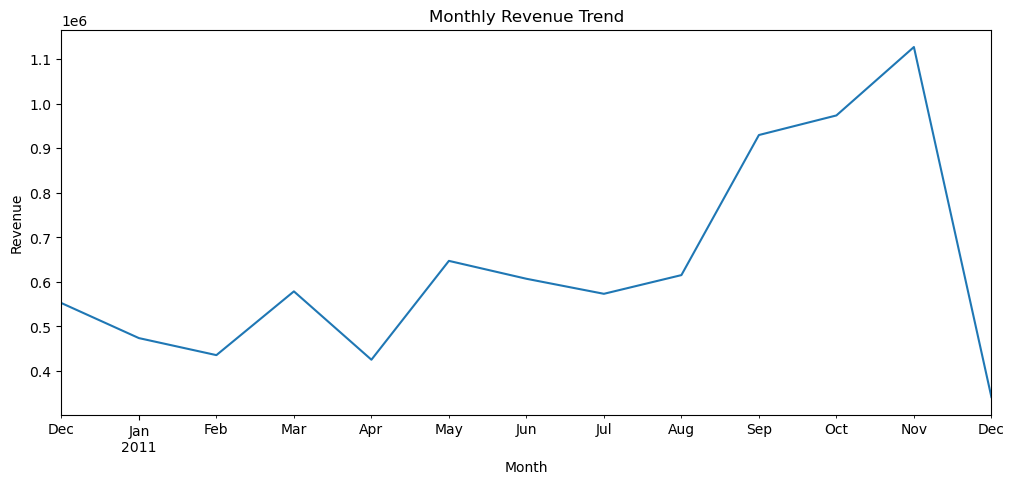

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
save_plot("04_monthly_revenue_trend.png")

Statistical Analysis

Correlation Analysis

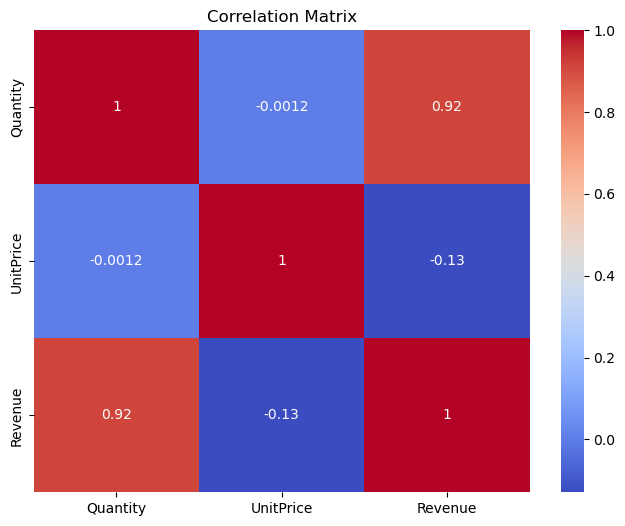

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity','UnitPrice','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
save_plot("05_correlation_matrix.png")


Customer Segmentation

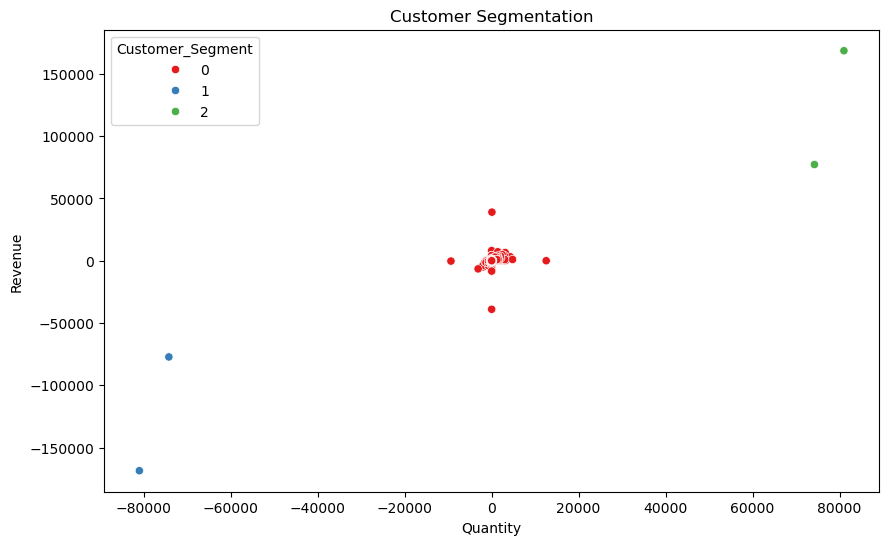

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data for better clustering
scaler = StandardScaler()
customer_data = df[['Quantity','Revenue']].copy()
customer_data_scaled = scaler.fit_transform(customer_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(customer_data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Revenue', hue='Customer_Segment', data=df, palette='Set1')
plt.title("Customer Segmentation")
save_plot("06_customer_segmentation.png")